In [236]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import math
%matplotlib inline

# Config
DATA_DIR = Path('.')
np.random.seed(1)

In [237]:
x = np.linspace(-5, 5, 1000) 
y = [1/(1 + np.exp(x)) for a in x]

columns = ['x']
result = pd.DataFrame(data = x, index = x, columns = columns)

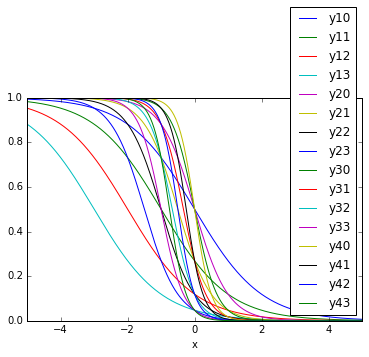

In [238]:
funclogit= dict()
logdf = dict()
coloop = ['x']
for x1 in range(1, 5):
    for x0 in range(4): 
        funclogit[(x1, x0)] = lambda x: 1/(1 + np.exp(x1 * x + x0))
        logdf[(x1, x0)] = pd.DataFrame(data = x, columns=columns)
        newcol = 'y{}{}'.format(x1, x0)
        logdf[(x1, x0)][newcol] = logdf[(x1, x0)].apply(funclogit[(x1, x0)], axis=1)
        result = pd.merge(result, logdf[(x1, x0)], on='x')
        
fig = plt.figure(figsize=(2,15))
result.plot(x='x')

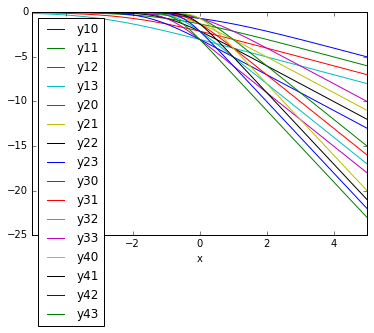

In [239]:
for x1 in range(1, 5):
    for x0 in range(4): 
        newcol = 'y{}{}'.format(x1, x0)
        result[newcol] = result.apply(lambda row: np.log(row[newcol]), axis=1)
    
result.plot(x = 'x')